Noise addition

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.misc import imread

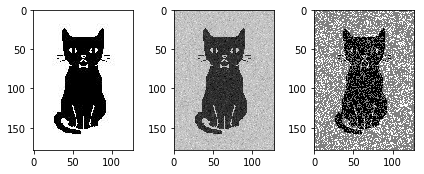

In [6]:
def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im)
    im2[index] += e[index]
    
    return im2

def add_saltnpepper_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = im2[index]-1
    
    return im2

#Proportion of pixels altered
prop = 0.7
varSigma = 0.1

im = imread('CatGray.jpg')
im = im/255
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')

imGauss = add_gaussian_noise(im,prop,varSigma)
ax2 = fig.add_subplot(132)
ax2.imshow(imGauss,cmap='gray')
imSalt = add_saltnpepper_noise(im,prop)
ax3 = fig.add_subplot(133)
ax3.imshow(imSalt,cmap='gray')
plt.tight_layout()

plt.show()

1 rounds
1 rounds


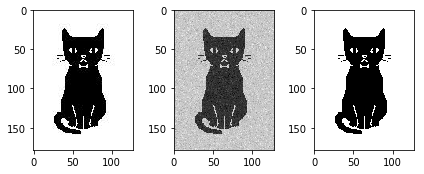

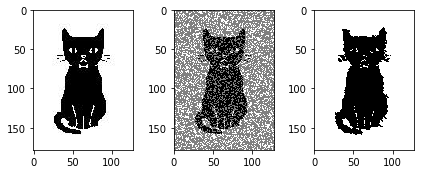

In [7]:
#Acces neighbours code
def neighbours(i,j,M,N,size = 4):
    if size == 4:
        if (i==0 and j==0):
            n=[(0,1),(1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2),(1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1),(M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2),(M-2,N-1)]
        elif i==0:
            n=[(0,j-1),(o,j+1),(1,j)]
        elif i==M-1:
            n=[(M-1,j-1),(M-1,j+1),(M-2,j)]
        elif j==0:
            n=[(i-1,0),(i+1,0),(i,1)]
        elif j==N-1:
            n=[(i-1,N-1),(i+1,N-1),(i,N-2)]
        else:
            n=[(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
            
        return n
    if size==8:
        if (i==0 and j==0):
            n=[(0,1),(1,0),(1,1)]
        elif i==0 and j==N-1:
            n=[(0,N-2),(1,N-1),(1,N-2)]
        elif i==M-1 and j==0:
            n=[(M-1,1),(M-2,0),(M-2,1)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2),(M-2,N-1),(M-2,N-2)]
        elif i==0:
            n=[(0,j-1),(0,j+1),(1,j),(1,j-1),(1,j+1)]
        elif i==M-1:
            n=[(M-1,j-1),(M-1,j+1),(M-2,j),(M-2,j-1),(M-2,j+1)]
        elif j==0:
            n=[(i-1,0),(i+1,0),(i,1),(i-1,1),(i+1,1)]
        elif j==N-1:
            n=[(i-1,N-1),(i+1,N-1),(i,N-2),(i-1,N-2),(i+1,N-2)]
        else:            
            n=[(i-1,j-1),(i,j-1),(i+1,j-1),(i-1,j),(i+1,j),(i+1,j+1),(i,j+1),(i+1,j+1)]
        return n
    
def ICM(img):
    #for each pixel in the image, evaluate E = hxi - beta xixj(neighbours) - nu xiyi(theoretical*real)
    #take lowest
    imShape = img.shape
    h = 0
    beta = 0.1
    nu = 4
    #for index, pixel in np.ndenumerate(img):
     #   i,j = index
      #  if(img[i,j] == 1):
      #      pass
      #  else:
      #      img[i,j] = -1;
    out = np.copy(img)
    temp = np.copy(out)
    #prevchange = 0;
    for p in range(0,100):
        change = 0
        for index, pixel in np.ndenumerate(img):
            i,j = index
            ne = neighbours(i,j,imShape[0],imShape[1],8)
            xj = -1
            xj2 = 1
            neighVal = 0
            neighVal2 = 0
            #print(img[i,j])
            for (m,n) in ne:
                neighVal += xj*out[m,n]
                neighVal2 += xj2*out[m,n]
            neighVal = np.exp(beta*neighVal)
            neighVal2 = np.exp(beta*neighVal2)
            Val = h*xj - neighVal - np.exp(nu*xj*img[i,j])
            Val2 = h*xj2 - neighVal2 - np.exp(nu*xj2*img[i,j])
            #print(Val)
            #print(Val2)
            if(Val2 == Val):
                pass
            elif(Val2 < Val):
                out[i,j] = xj2
                #if not(img[i,j] == out[i,j]):
                    #change += 1
            else:
                out[i,j] = xj
                #if not(img[i,j] == out[i,j]):
                    #change += 1
            #print(out[i,j])
                
        #print(change)
        if(out[index] == temp[index]):
            print(str(p) + " rounds")
            break
        else:
            temp[index] = out[index]
        #prevchange = change
        
    for index, pixel in np.ndenumerate(out):
        i,j = index
        if(out[i,j] == 1):
            out[i,j] = 255
        else:
            out[i,j] = 0;
    #fig = plt.figure()
    #ax = fig.add_subplot(131)
    #ax.imshow(out,cmap='gray')
    return out
            
            
prop = 0.7
varSigma = 0.1

im = imread('CatGray.jpg')
im = im/255
#fig = plt.figure()
#ax = fig.add_subplot(131)
#ax.imshow(im,cmap='gray')
#output = output_start + ((output_end - output_start) / (input_end - input_start)) * (input - input_start)
imGauss = add_gaussian_noise(im,prop,varSigma)
for index ,pixel in np.ndenumerate(imGauss):
    i,j = index
    imGauss[i,j] = -1 + ((1--1)/(1-0))*(imGauss[i,j])
#    if(imGauss[i,j] > 0.5):
#        imGauss[i,j] = 1
#    else:
#        imGauss[i,j] = -1
fig1 = plt.figure()
ax1 = fig1.add_subplot(131)
ax1.imshow(im,cmap='gray')
ax2 = fig1.add_subplot(132)
ax2.imshow(imGauss,cmap='gray')
out = ICM(imGauss)
ax3 = fig1.add_subplot(133)
ax3.imshow(out,cmap='gray')
plt.tight_layout()

fig2 = plt.figure()
ax1 = fig2.add_subplot(131)
ax1.imshow(im,cmap='gray')
imSalt = add_saltnpepper_noise(im,prop)
ax2 = fig2.add_subplot(132)
ax2.imshow(imSalt,cmap='gray')
out = ICM(imSalt)
ax3 = fig2.add_subplot(133)
ax3.imshow(out,cmap='gray')
plt.tight_layout()
plt.show()
            

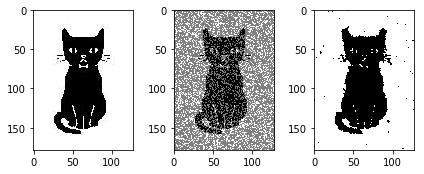

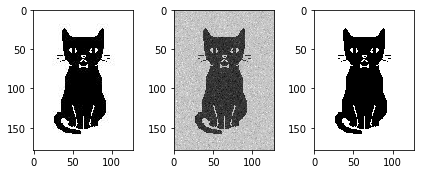

In [8]:
def gibbs(img,iterations):
    imShape = img.shape
    imgX = img
    imgY = np.copy(img)
    imgZ = np.copy(img)
    h = 0
    beta = 2
    nu = 50
    out = np.copy(img)
    for tau in range (0,iterations):
        for index, pixel in np.ndenumerate(img):
            i,j = index
            ne = neighbours(i,j,imShape[0],imShape[1],8)
            xj = 1
            xj2 = -1
            neighVal = 0
            neighVal2 = 0
            for (m,n) in ne:
                neighVal += xj*imgX[m,n]
                neighVal2 += xj2*imgX[m,n]
            neighVal = np.exp(beta*neighVal)
            neighVal2 = np.exp(beta*neighVal2)
            
            Val = neighVal*np.exp(nu*xj*imgY[i,j])
            Val2 = neighVal2*np.exp(nu*xj2*imgY[i,j])
            Denom = Val + Val2
            Val = Val/Denom
            random = np.random.random_sample()
            if Val < random:
                imgZ[i, j] = -1
            else:
                imgZ[i, j] = 1
        #if(imgZ[index] == imgX[index]):
        #    print("jumping out")
        #    break
        imgY = np.copy(imgX)
        imgX = np.copy(imgZ)
        
    out = np.copy(imgZ)
    return out

prop = 0.7
varSigma = 0.1

im = imread('CatGray.jpg')
im = im/255
#fig = plt.figure()
#ax = fig.add_subplot(131)
#ax.imshow(im,cmap='gray')

imGauss = add_gaussian_noise(im,prop,varSigma)
for index ,pixel in np.ndenumerate(imGauss):
    i,j = index
    imGauss[i,j] = -1 + ((1--1)/(1-0))*(imGauss[i,j])
#ax2 = fig.add_subplot(132)
#ax2.imshow(imGauss,cmap='gray')
imSalt = add_saltnpepper_noise(im,prop)
#ax3 = fig.add_subplot(133)
#ax3.imshow(imSalt,cmap='gray')

fig1 = plt.figure()
ax1 = fig1.add_subplot(131)
ax1.imshow(im,cmap='gray')
ax2 = fig1.add_subplot(132)
ax2.imshow(imSalt,cmap='gray')
out = gibbs(imSalt,20)
ax3 = fig1.add_subplot(133)
ax3.imshow(out,cmap='gray')
plt.tight_layout()

fig2 = plt.figure()
ax1 = fig2.add_subplot(131)
ax1.imshow(im,cmap='gray')
ax2 = fig2.add_subplot(132)
ax2.imshow(imGauss,cmap='gray')
out = gibbs(imGauss,20)
ax3 = fig2.add_subplot(133)
ax3.imshow(out,cmap='gray')
#print("passed")
#print(imSalt[20,30])
plt.tight_layout()
plt.show()

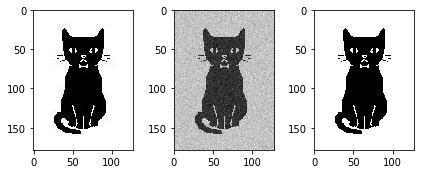

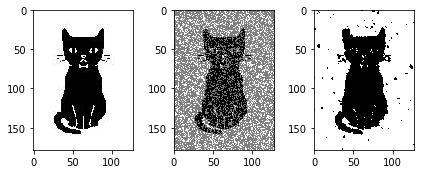

In [9]:
def gibbsRand(img,iterations):
    imShape = img.shape
    imgX = img
    imgY = np.copy(img)
    imgZ = np.copy(img)
    h = 0
    beta = 3
    nu = 50
    out = np.copy(img)
    np.random.seed(42)
    for tau in range (0,iterations):
        i = np.random.randint(0,imShape[0])
        j = np.random.randint(0,imShape[1])
        ne = neighbours(i,j,imShape[0],imShape[1],8)
        xj = 1
        xj2 = -1
        neighVal = 0
        neighVal2 = 0
        for (m,n) in ne:
            neighVal += xj*imgX[m,n]
            neighVal2 += xj2*imgX[m,n]
        neighVal = np.exp(beta*neighVal)
        neighVal2 = np.exp(beta*neighVal2)

        Val = neighVal*np.exp(nu*xj*imgY[i,j])
        Val2 = neighVal2*np.exp(nu*xj2*imgY[i,j])
        Denom = Val + Val2
        Val = Val/Denom
        random = np.random.random_sample()
        if Val < random:
            imgZ[i, j] = -1
        else:
            imgZ[i, j] = 1
        #if(imgZ[index] == imgX[index]):
        #    print("jumping out")
        #    break
        imgY = np.copy(imgX)
        imgX = np.copy(imgZ)
        
    out = np.copy(imgZ)
    return out

prop = 0.7
varSigma = 0.1

im = imread('CatGray.jpg')
im = im/255
#fig = plt.figure()
#ax = fig.add_subplot(131)
#ax.imshow(im,cmap='gray')

imGauss = add_gaussian_noise(im,prop,varSigma)
for index ,pixel in np.ndenumerate(imGauss):
    i,j = index
    imGauss[i,j] = -1 + ((1--1)/(1-0))*(imGauss[i,j])
#ax2 = fig.add_subplot(132)
#ax2.imshow(imGauss,cmap='gray')
imSalt = add_saltnpepper_noise(im,prop)
#ax3 = fig.add_subplot(133)
#ax3.imshow(imSalt,cmap='gray')

fig1 = plt.figure()
ax1 = fig1.add_subplot(131)
ax1.imshow(im,cmap='gray')
ax2 = fig1.add_subplot(132)
ax2.imshow(imGauss,cmap='gray')
out = gibbsRand(imGauss,300000)
ax3 = fig1.add_subplot(133)
ax3.imshow(out,cmap='gray')
plt.tight_layout()

fig2 = plt.figure()
ax1 = fig2.add_subplot(131)
ax1.imshow(im,cmap='gray')
ax2 = fig2.add_subplot(132)
ax2.imshow(imSalt,cmap='gray')
out = gibbsRand(imSalt,300000)
ax3 = fig2.add_subplot(133)
ax3.imshow(out,cmap='gray')
plt.tight_layout()
#print("passed")
#print(imSalt[20,30])
plt.show()

# Variational Bayes for Ising Model

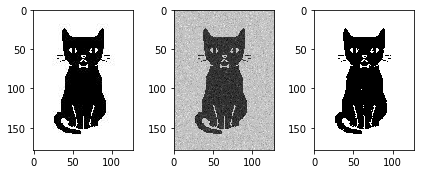

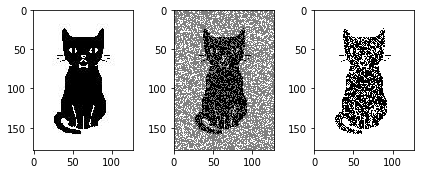

In [10]:
def meanFieldVariationalBayes(img):
    imShape = img.shape
    imMu = np.copy(img)
    imMu2 = np.copy(imMu)
    imMi = np.copy(imMu)
    imMi2 = np.copy(imMu)
    imLi = np.copy(imMu)
    imLin = np.copy(imLi)
    beta = 8
    nu = 15
    for index , pixel in np.ndenumerate(imLi):
        i,j = index
        imLi[i,j] = (np.exp(nu*1*img[i,j]) - np.exp(nu*-1*img[i,j]))/2
        imMu[index] = np.random.random_sample()
        ne = neighbours(i,j,imShape[0],imShape[1],8)
        M = 0
        for (m,n) in ne:
            M += beta*imMu[m,n]
        imMi[i,j] = M
    for t in range(0,50):
        for index, pixel in np.ndenumerate(imMu):
            i,j = index
            ne = neighbours(i,j,imShape[0],imShape[1],8)
            M = 0
            for (m,n) in ne:
                M += np.exp(beta*imMu[m,n])
            imMi2[i,j] = M
            imMu2[i,j] = np.tanh(imMi[i,j] + imLi[i,j])
        imMu = np.copy(imMu2)
        imMi = np.copy(imMi2)
    for index , pixel in np.ndenumerate(imMu2):
        if imMu2[index] > 0.4:
            imMu2[index] = 1
        else:
            imMu2[index] = -1
    return imMu2

prop = 0.7
varSigma = 0.1

im = imread('CatGray.jpg')
im = im/255
#fig = plt.figure()
#ax = fig.add_subplot(131)
#ax.imshow(im,cmap='gray')

imGauss = add_gaussian_noise(im,prop,varSigma)
for index ,pixel in np.ndenumerate(imGauss):
    i,j = index
    imGauss[i,j] = -1 + ((1--1)/(1-0))*(imGauss[i,j])
#ax2 = fig.add_subplot(132)
#ax2.imshow(imGauss,cmap='gray')
imSalt = add_saltnpepper_noise(im,prop)
#ax3 = fig.add_subplot(133)
#ax3.imshow(imSalt,cmap='gray')

fig1 = plt.figure()
ax1 = fig1.add_subplot(131)
ax1.imshow(im,cmap='gray')
ax2 = fig1.add_subplot(132)
ax2.imshow(imGauss,cmap='gray')
out = meanFieldVariationalBayes(imGauss)
ax3 = fig1.add_subplot(133)
ax3.imshow(out,cmap='gray')
plt.tight_layout()

fig2 = plt.figure()
ax1 = fig2.add_subplot(131)
ax1.imshow(im,cmap='gray')
ax2 = fig2.add_subplot(132)
ax2.imshow(imSalt,cmap='gray')
out = meanFieldVariationalBayes(imSalt)
ax3 = fig2.add_subplot(133)
ax3.imshow(out,cmap='gray')
plt.tight_layout()
#print("passed")
#print(imSalt[20,30])
plt.show()

# Image Segmentation

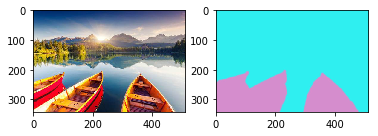

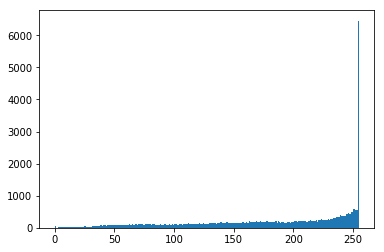

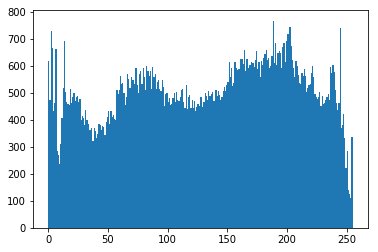

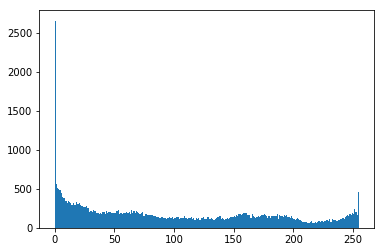

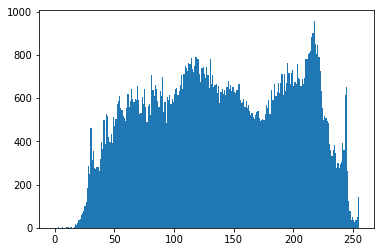

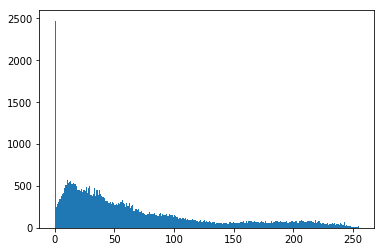

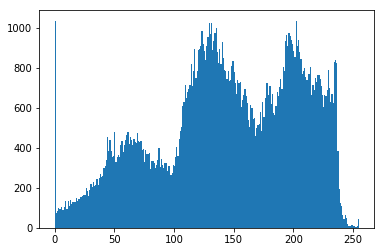

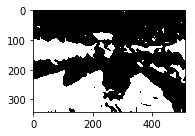

In [11]:
def imageSeg(img,histForeR,histBackR,histForeG,histBackG,histForeB,histBackB):
    imShape = img.shape
    imMu = np.random.randn(imShape[0], imShape[1])
    imMu2 = np.copy(imMu)
    imMi = np.copy(imMu)
    imMi2 = np.copy(imMu)
    imLi = np.copy(imMu)
    beta = 1
    nu = 89
    threshold = 0
    for index , pixel in np.ndenumerate(imMu):
        i,j = index
        pullR = img[i,j,0]
        pullG = img[i,j,1]
        pullB = img[i,j,2]
        fore = (histForeR[0][pullR]) + (histForeG[0][pullG]) + (histForeB[0][pullB])
        back = (histBackR[0][pullR]) + (histBackG[0][pullG]) + (histBackB[0][pullB])
        #denom = (histForeR[0][pullR] + histBackR[0][pullR] + histForeG[0][pullG] + histBackG[0][pullG] + histForeB[0][pullB] + histBackB[0][pullB])
        imLi[i,j] = nu*(fore - back)
        #print(imLi[i,j])
        ne = neighbours(i,j,imShape[0],imShape[1],8)
        M = imMu[i,j]
        for (m,n) in ne:
            M += beta*imMu[m,n]
        imMi[i,j] = M
    for t in range(0,50):
        for index, pixel in np.ndenumerate(imMu):
            i,j = index
            ne = neighbours(i,j,imShape[0],imShape[1],8)
            M = 0
            for (m,n) in ne:
                M += beta*imMu[m,n]
            imMi2[i,j] = M
            imMu2[i,j] = np.tanh(imMi[i,j] + imLi[i,j])
        imMu = np.copy(imMu2)
        imMi = np.copy(imMi2)
#     for index , pixel in np.ndenumerate(imMu2):
#         if imMu2[index] > 0:
#             imMu2[index] = 1
#         else:
#             imMu2[index] = -1
    return (imMu2 > threshold).astype(float)

im = imread("boat.jpg")
imFor = imread('boatFore.jpg')
foregroundR = []
backgroundR = []
foregroundG = []
backgroundG = []
foregroundB = []
backgroundB = []
colourHist = 256
histo = []
for i in range(0,256):
    histo.append(i)
#print(colourHist)
##background = 47  foreground = 240/239
count = 0
for index, pixel in np.ndenumerate(imFor):
    i,j,k = index
    if k == 0:
        if(pixel == 47):
            backgroundR.append(im[i,j,k])
        else:
            foregroundR.append(im[i,j,k])
    elif k == 1:
        if(pixel == 239):
            backgroundG.append(im[i,j,k])
        else:
            foregroundG.append(im[i,j,k])
    else:
        if(pixel == 240):
            backgroundB.append(im[i,j,k])
        else:
            foregroundB.append(im[i,j,k])
        
#print(foreground)
foreR = np.histogram(foregroundR,bins = colourHist,density=True)
backR = np.histogram(backgroundR,bins = colourHist,density=True)
foreG = np.histogram(foregroundG,bins = colourHist,density=True)
backG = np.histogram(backgroundG,bins = colourHist,density=True)
foreB = np.histogram(foregroundB,bins = colourHist,density=True)
backB = np.histogram(backgroundB,bins = colourHist,density=True)

fig = plt.figure()
ax1 =fig.add_subplot(121)
ax1.imshow(im)
ax2 = fig.add_subplot(122)
ax2.imshow(imFor)

fig2 = plt.figure()
plt.hist(foregroundR,bins = histo)
fig3 = plt.figure()
plt.hist(backgroundR,bins = histo)
fig4 = plt.figure()
plt.hist(foregroundG,bins = histo)
fig5 = plt.figure()
plt.hist(backgroundG,bins = histo)
fig6 = plt.figure()
plt.hist(foregroundB,bins = histo)
fig7 = plt.figure()
plt.hist(backgroundB,bins = histo)

fig8 = plt.figure()
ax3 = fig8.add_subplot(121)
out = imageSeg(im,foreR,backR,foreG,backG,foreB,backB)
ax3.imshow(out,cmap='gray')
plt.show()